## 0. Load Stuff


In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import geopandas as gpd

Load in the dataframe found [here](https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv) as the variable `voters`. Make sure you are familiar with the data, whose origins are [here](https://github.com/fivethirtyeight/data/tree/master/voter-registration).

In [191]:
voters = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/refs/heads/master/voter-registration/new-voter-registrations.csv")

##Introduction




Purpose: To analyze voter registration trends in the United States, both nationally and within a specific state, to identify patterns and potential factors influencing voter participation.

Goal: To provide data-driven insights into voter registration dynamics that can inform policy decisions and outreach strategies aimed at increasing voter engagement.

It is important for someone to read this notebook because it presents an analysis of voter registration data, offering valuable insights into patterns and trends that can inform efforts to improve voter participation. The findings could be useful for policymakers, election officials, and researchers interested in voter behavior and demographics.

Research Questions:
1. What is the overall national trend in new voter registrations over time, and are there any notable patterns or correlations?

2. How have new voter registrations in California changed between 2016 and 2020, and are there any notable variations or patterns? How does this compare to the overall national trend?




## 1. Data Processing

In [192]:
voters.head(5)

,Jurisdiction,Year,Month,New registered voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229


The jurisdiction is the state where the voters registered.
The year is the year the voters registered
The month is the month the voters registered
The New registered voters variable is the amount of newly registered voters.

In [193]:
voters.isna()

,Jurisdiction,Year,Month,New registered voters
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
101,False,False,False,False
102,False,False,False,False
103,False,False,False,False
104,False,False,False,False


There are no missing datas

In [194]:
voters.dtypes

,0
Jurisdiction,object
Year,int64
Month,object
New registered voters,int64


Jurisdition and Month are objects, Year and New Registered voters are integers.

In [195]:
voters=voters.rename(columns={"Jurisdiction":"NAME",
                              "New registered voters":"registered_voters"})
voters

,NAME,Year,Month,registered_voters
0,Arizona,2016,Jan,25852
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
3,Arizona,2016,Apr,30668
4,Arizona,2020,Jan,33229
...,...,...,...,...
101,Virginia,2020,Jan,25934
102,Virginia,2020,Feb,29507
103,Virginia,2020,Mar,31492
104,Virginia,2020,Apr,5467




1. The data focuses on new voter registrations at the state level. It doesn't provide information on demographics within states (e.g., county, city). This limits the ability to understand variations in registration trends within states.


2. The data represents total new registrations, not net changes.  An increase in registrations doesn't necessarily equate to a net increase in the number of voters, as existing voters might be updating their registration. The data doesn't account for changes in voter eligibility due to factors such as death or relocation. This makes it challenging to determine the precise impact on the overall electorate.


###Exploratory Data Analysis

In [196]:
# Find the row with the maximum number of registered voters
max_new_voter_registration = voters.loc[voters["registered_voters"].idxmax()]

# Extract the relevant information
state = max_new_voter_registration["NAME"]
month = max_new_voter_registration["Month"]
year = max_new_voter_registration["Year"]
registered_voters = max_new_voter_registration["registered_voters"]

# Print the results
print(state)
print(month)
print(year)
print(registered_voters)

California
Feb
2020
238281


The highest amount of new voter registration was in California in Feb, 2020 with 238281 registered voters.

In [197]:
# Calculate the average voter registration
average_voter_registration = voters["registered_voters"].mean()

# Print the result
print(average_voter_registration)


48223.46226415094


The average voter registration was 48223.46226415094 voters.

In [198]:
high_voters = voters[voters["registered_voters"] > average_voter_registration]

times_above_average = len(high_voters)

print(times_above_average)
high_voters


36


,NAME,Year,Month,registered_voters
1,Arizona,2016,Feb,51155
2,Arizona,2016,Mar,48614
5,Arizona,2020,Feb,50853
8,California,2016,Jan,87574
9,California,2016,Feb,103377
10,California,2016,Mar,174278
11,California,2016,Apr,185478
12,California,2020,Jan,151595
13,California,2020,Feb,238281
14,California,2020,Mar,176810


Voter regristation was above average 36 times.


In [199]:
# Group the 'high_voters' DataFrame by state ('NAME') and count the occurrences
state_counts = high_voters.groupby('NAME')['registered_voters'].count()

# Print the result
state_counts


,registered_voters
NAME,
Arizona,3
California,7
Florida,7
Georgia,1
Illinois,4
North Carolina,6
Texas,8


Texas went above average for new voter registration 8 times. North Carolina went above average for new voter registration 6 times. Illinois went above average for new voter registration 4 times. Georgia went above average for new voter registration 1 time. Florida and California went above average for new voter registration 7 times. Arizona went above average for new voter registration 3 times.

In [200]:
# Group by state and calculate the average voter registration
average_registration_by_state = voters.groupby('NAME')['registered_voters'].mean()

# Sort the states by average registration in descending order and get the top three
top_three_states = average_registration_by_state.sort_values(ascending=False).head(3)

# Print the top three states and their average voter registrations
top_three_states

,registered_voters
NAME,
California,144545.375
Texas,114610.100
Florida,65868.125


The three states that had the highest average voter registration overall are California, Texas, and Florida.

##Data Visualization

<ipython-input-201-a3a4b6b6d871>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(voter_registration_by_state, x = "NAME", y = "registered_voters", palette = "pastel")


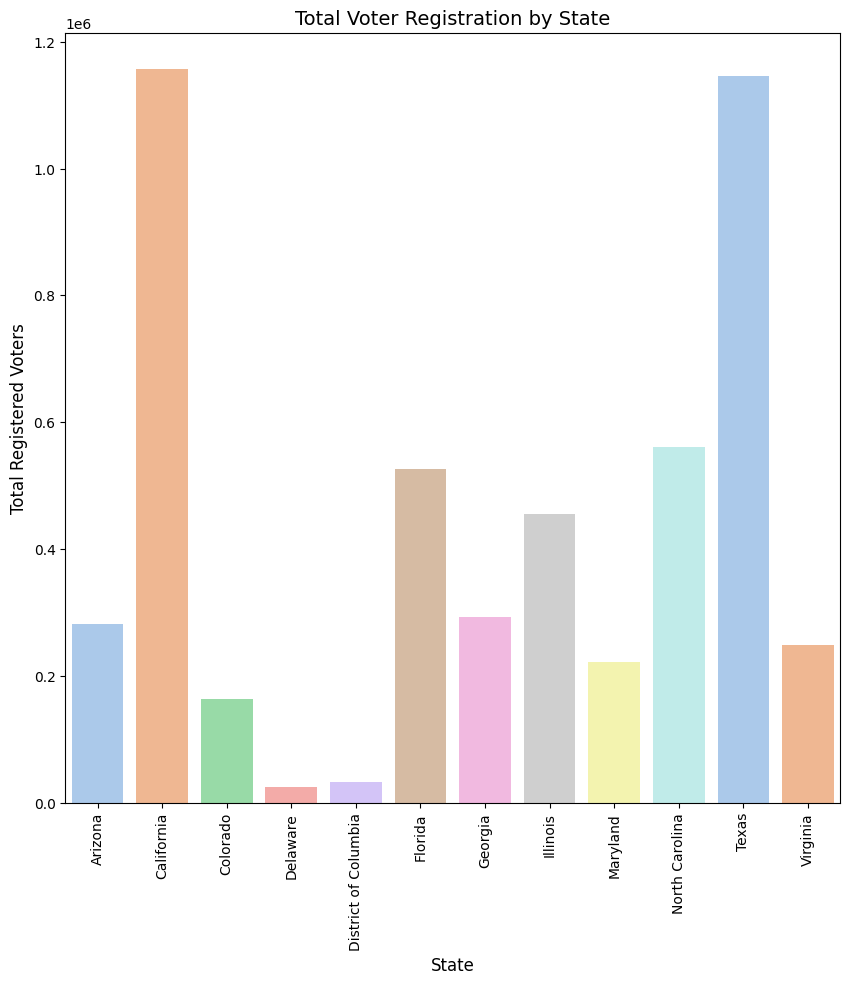

In [201]:
# Group by state and sum the registered voters
voter_registration_by_state = voters.groupby("NAME")["registered_voters"].sum().reset_index()

# Create the plot
plt.figure(figsize = (10, 10))
sns.barplot(voter_registration_by_state, x = "NAME", y = "registered_voters", palette = "pastel")
plt.xlabel("State", fontsize = 12)
plt.ylabel("Total Registered Voters", fontsize = 12)
plt.title("Total Voter Registration by State", fontsize = 14)
plt.xticks(rotation = 90)
plt.show()

The visualization shows the total number of new voter registrations per state. States like Texas and California display significantly higher total voter registrations compared to other states. This might reflect larger populations in these states. On the other hand, Delaware and District of Columbia has a significantly lower vote registration compared to other states reflecting lower populations in those areas.


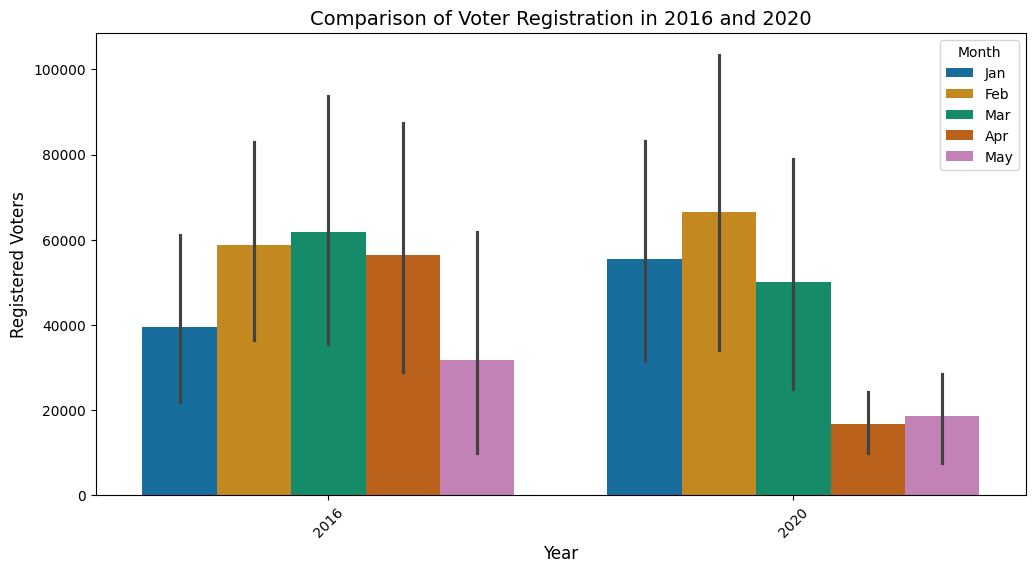

In [202]:
# Filter data for 2016 and 2020
voters_2016_2020 = voters[voters["Year"].isin([2016, 2020])]

# Create the plot
plt.figure(figsize = (12, 6))
sns.barplot(voters_2016_2020, x = "Year", y = "registered_voters", hue = "Month", palette = "colorblind")
plt.xlabel("Year", fontsize=12)
plt.ylabel("Registered Voters", fontsize=12)
plt.title("Comparison of Voter Registration in 2016 and 2020", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Month")
plt.show()

The plot visually compares voter registration in 2016 vs 2020 for different months. The plot looks rather uniformly distributed for the 2016 model and skewed right for the 2020 model. It appears that voter registration tends to be the largest in March of 2016 and February of 2020. On the other hand, voter registration is the least in May of 2016 and April of 2020. This can indicate that something happened between 2016 and 2020 skewed the distribution of voter registration in 2020.

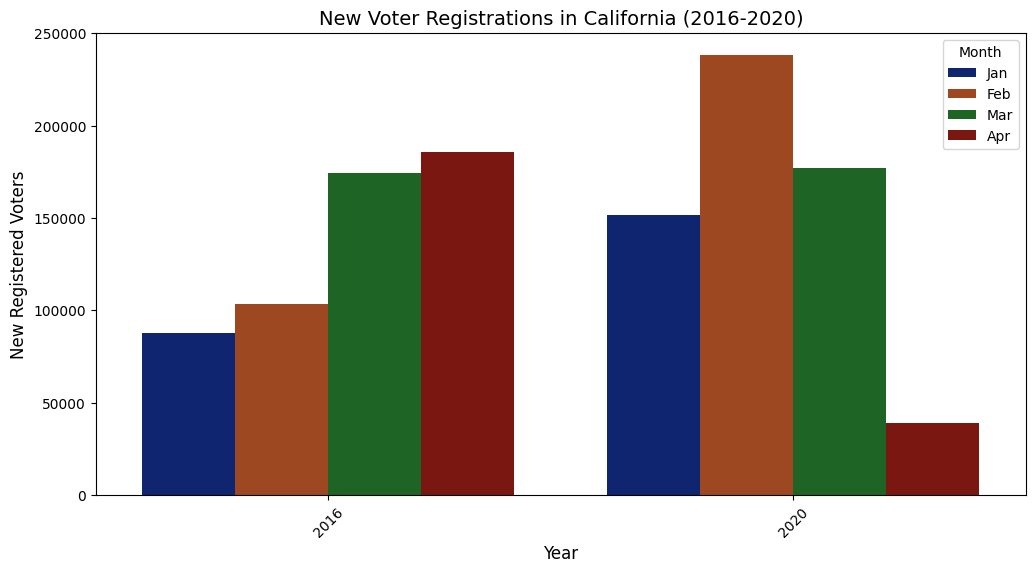

In [203]:
# Create a bar plot of new voter registrations in California over time.
ca_voters = voters[voters["NAME"] == "California"]

plt.figure(figsize=(12, 6))
sns.barplot(ca_voters, x = "Year", y = "registered_voters", hue = "Month", palette="dark")
plt.xlabel("Year", fontsize = 12)
plt.ylabel("New Registered Voters", fontsize = 12)
plt.title("New Voter Registrations in California (2016-2020)", fontsize =14)
plt.xticks(rotation = 45)
plt.legend(title="Month")
plt.show()

The plot visually compares voter registration for the state of california in 2016 vs 2020 for different months. The plot looks completely different compared to nationally. There were no voter registrations in the month of May in California in 2016 and 2020 where as there were nationally. This is surprising considereing the state's population and size. In 2016, voter registration appears to increase every month in California between Janurary and April while the plot was normally distributed for voter registration nationally. However, they do both have somewhat of a similar distribution for 2020. It appears that voter registration for California tends to be the largest in April in 2016 compared to March nationally. However, they both have the highest voter registration in the month of February in 2020. Similarily, they both had the least voter registration in Janurary of the year 2016 and April of the year 2020. This indicates that voter registration in the state of California alone is similar in ways, but also very different compared nationally.

##Mapping

In [204]:
!git clone https://github.com/SFord87/325-Datasets

fatal: destination path '325-Datasets' already exists and is not an empty directory.


In [205]:
shapefile = '/content/325-Datasets/cb_2018_us_state_500k.shp'

states = gpd.read_file(shapefile)

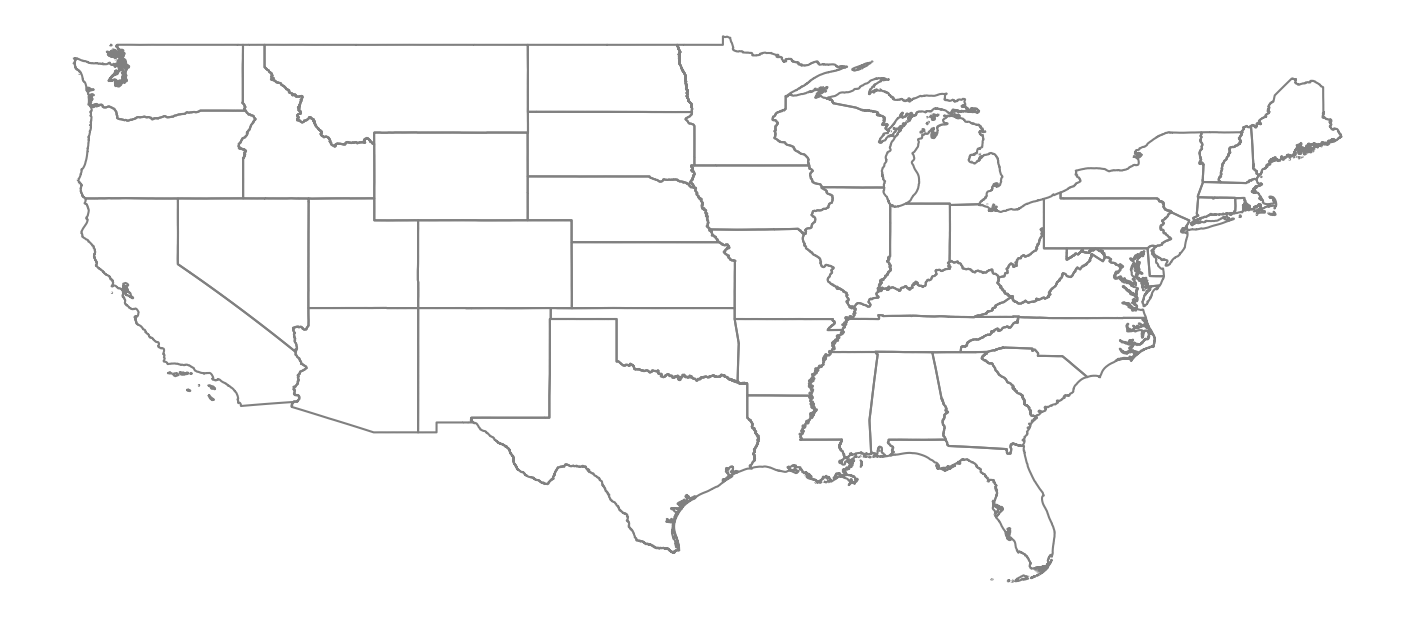

In [206]:
minx, miny, maxx, maxy = -125, 24.396308, -66.93457, 49.384358

bbox = states.cx[minx:maxx, miny:maxy]

us_map=bbox.boundary.plot(figsize=(18,12),color="gray") #base map
us_map.axis("off")
plt.show()

In [207]:
# Group by state and calculate the average voter registration
average_registration_per_state = voters.groupby("NAME")["registered_voters"].mean().reset_index()

# Display the DataFrame
average_registration_per_state


,NAME,registered_voters
0,Arizona,35311.500
1,California,144545.375
2,Colorado,20527.500
3,Delaware,3166.375
4,District of Columbia,3248.400
5,Florida,65868.125
6,Georgia,36604.125
7,Illinois,56840.375
8,Maryland,22133.500
9,North Carolina,56040.800


The average voter registration per state is 35311.5 for Arizona, 144545.375 for California, 20527.5 for Colorado, 3166.375 for Delaware, 3248.4 for DC, 65868.125 for Florida, 36604.125 for Georgia, 56840.375 for Illinois, 22133.5 for Maryland, 56040.8 for North Caolina, 114610.1 for Texas, and 24845.2 for Virginia.

In [208]:
# Merge the dataframes
merged_data = bbox.merge(average_registration_per_state, on = "NAME", how = "inner")

# Display the merged DataFrame
merged_data


,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry,registered_voters
0,37,01027616,0400000US37,37,NC,North Carolina,00,125923656064,13466071395,"MULTIPOLYGON (((-75.72681 35.93584, -75.71827 ...",56040.800
1,51,01779803,0400000US51,51,VA,Virginia,00,102257717110,8528531774,"MULTIPOLYGON (((-75.74241 37.80835, -75.74151 ...",24845.200
2,12,00294478,0400000US12,12,FL,Florida,00,138949136250,31361101223,"MULTIPOLYGON (((-80.17628 25.52505, -80.17395 ...",65868.125
3,48,01779801,0400000US48,48,TX,Texas,00,676653171537,19006305260,"MULTIPOLYGON (((-94.7183 29.72886, -94.71721 2...",114610.100
4,06,01779778,0400000US06,06,CA,California,00,403503931312,20463871877,"MULTIPOLYGON (((-118.60442 33.47855, -118.5987...",144545.375
5,13,01705317,0400000US13,13,GA,Georgia,00,149482048342,4422936154,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ...",36604.125
6,08,01779779,0400000US08,08,CO,Colorado,00,268422891711,1181621593,"POLYGON ((-109.06025 38.59933, -109.05954 38.7...",20527.500
7,17,01779784,0400000US17,17,IL,Illinois,00,143780567633,6214824948,"POLYGON ((-91.51297 40.18106, -91.51107 40.188...",56840.375
8,04,01779777,0400000US04,04,AZ,Arizona,00,294198551143,1027337603,"POLYGON ((-114.81629 32.50804, -114.81432 32.5...",35311.500
9,11,01702382,0400000US11,11,DC,District of Columbia,00,158340391,18687198,"POLYGON ((-77.11976 38.93434, -77.11253 38.940...",3248.400


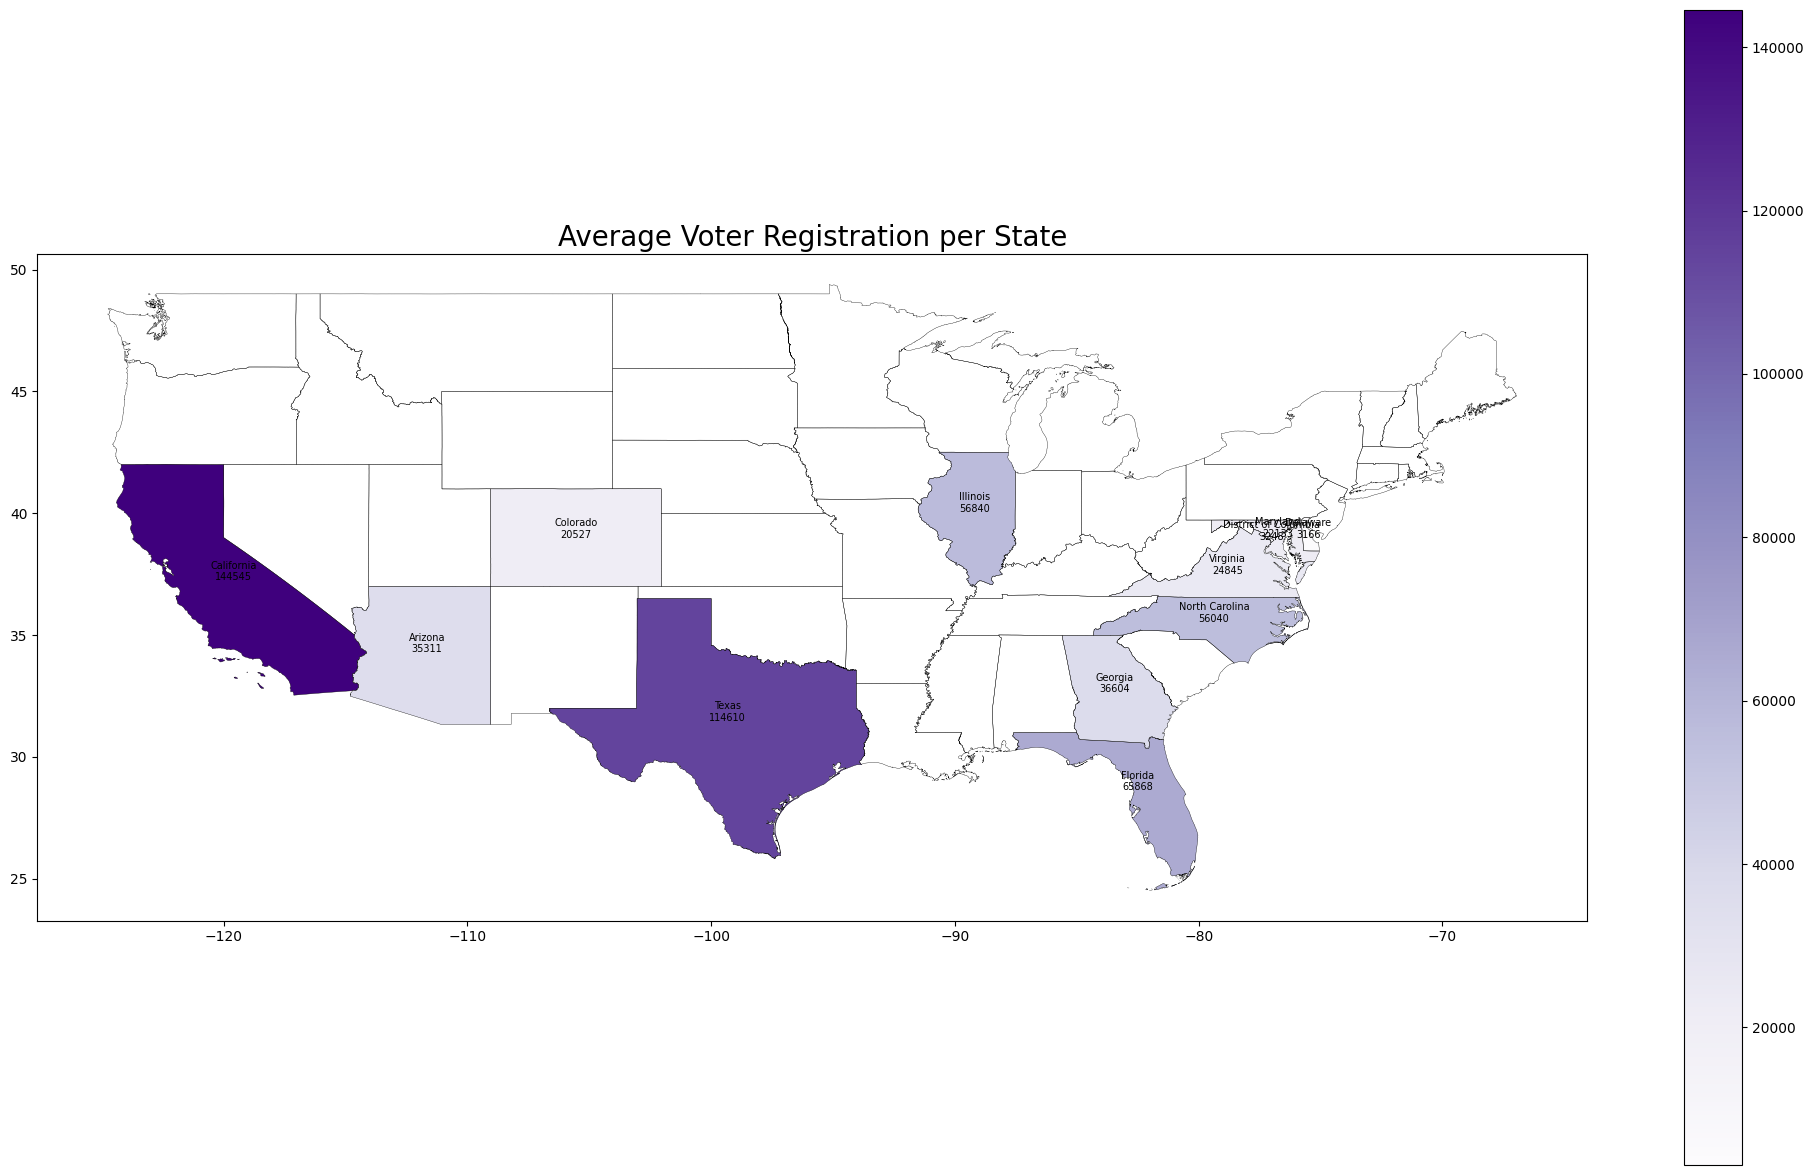

In [209]:
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot()

# Plot the boundary map
bbox.boundary.plot(ax = ax, linewidth = 0.25, color = "black")

# Plot the merged data with colormap
merged_data.plot(column = "registered_voters", ax = ax, legend = True, cmap = "Purples")

merged_data.apply(lambda x: ax.annotate(
    text = x.NAME + "\n" + str(int(x.registered_voters)),
    xy = (x.geometry.centroid.x, x.geometry.centroid.y),
    ha = "center",
    fontsize = 7), axis = 1)

# Customize the plot
ax.set_title('Average Voter Registration per State', fontsize=20)

plt.show()


##Conclusion

Write a conclusion section that includes
* Insights: the insights/outcomes of your notebook (5 points)
* Suggestions: Any suggestions or ideas you could offer your client (5 point)
* Possible next steps: At least one step that you would take if continuing to work with this project (5 points)


Each section should be at least 3-4 complete sentenes.


### Insights

This analysis of new voter registrations from 2016 to 2020 reveals significant variations across states and over time.  California and Texas consistently shows high registration numbers, DC and Delaware consistently show low registration numbers, other states are somewhere in between all over the place.  The data also highlights a notable peak in registrations in February 2020, potentially indicating the impact of a specific event or heightened political engagement around that period.  Further investigation into external factors, such as major elections or political events, is warranted to fully understand these fluctuations.


### Suggestions

To enhance the effectiveness of voter registration initiatives, consider targeted outreach campaigns in states with consistently lower registration numbers.  These campaigns could focus on addressing potential barriers to registration and promoting the importance of voter participation in these specific regions.  Furthermore, exploring the correlation between demographic data (age, income, ethnicity) and voter registration rates could provide more detailed insights for optimizing resource allocation and preparing outreach strategies to different demographic segments. This nuanced approach is crucial for maximizing voter engagement.


### Possible Next Steps

A possible next step would involve incorporating demographic data into the analysis. By merging voter registration statistics with demographic data, we could identify correlations between demographic characteristics and registration patterns within states.  This would enable a more specific analysis of the factors influencing voter registration.  Specifically, looking at age, income level, and ethnicity in correlation with registration rates would allow us to identify any potential disparities or trends in voter participation across different groups.


##Github

https://github.com/dzheng125/325-Midterm.git

# Academic Integrity Statement

By writing my name in the cell below, I certify that:

1. I did not use resources other than:
   * the Python notebooks provided by the instructor,
   * links provided in this notebook,
   * the assigned readings, and
   * my own personal notes
2. This means that I did not:
   * look up anything on Google, or Stack Overflow, Chatgpt, &c.,
   * discuss the content of the exam with *anyone* other than the instructors or TAs, or
   * do anything that technically doen't break these rules but is against their spirit.

David Zheng